In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
from sqlalchemy import MetaData

In [6]:
# reflect an existing database into a new model
metadata = MetaData()
metadata.reflect(bind=engine)
# reflect the tables
Base = automap_base(metadata=metadata)
Base.prepare()

In [8]:
# View all of the classes that automap found
class_names = Base.classes.keys()

# Print the class names
for class_name in class_names:
    print(class_name)

station
measurement


In [9]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
results_station = session.query(station).all()
results_measurement = session.query(measurement)

# Exploratory Precipitation Analysis

In [11]:
from datetime import datetime, timedelta

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
print(most_recent_date)

2017-08-23


In [13]:
import matplotlib.dates as mdates

(array([17045., 17106., 17167., 17226., 17287., 17348., 17410.]),
 [Text(17045.0, 0, '2016-09'),
  Text(17106.0, 0, '2016-11'),
  Text(17167.0, 0, '2017-01'),
  Text(17226.0, 0, '2017-03'),
  Text(17287.0, 0, '2017-05'),
  Text(17348.0, 0, '2017-07'),
  Text(17410.0, 0, '2017-09')])

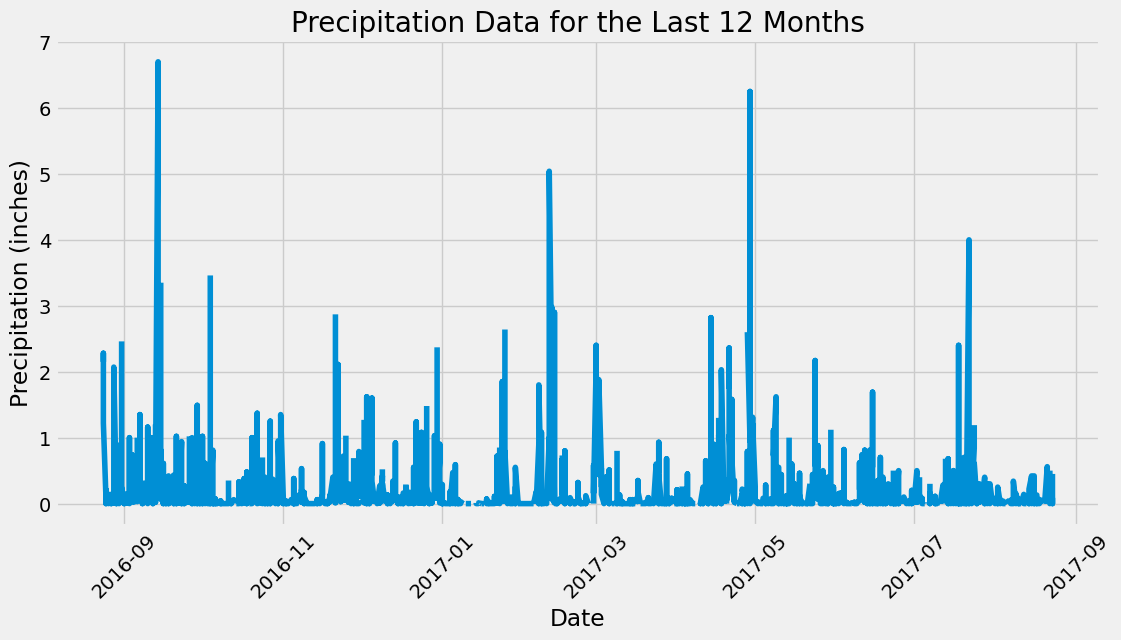

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= one_year_ago).filter(measurement.date <= most_recent_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_data_sorted_df = pd.read_sql_query(query.statement, engine, index_col='date', parse_dates={'date': '%Y-%m-%d'})

# Sort the dataframe by date
precipitation_data_sorted_df.sort_index(inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12, 6))
plt.plot(precipitation_data_sorted_df.index, precipitation_data_sorted_df['prcp'], label='precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Data for the Last 12 Months')
plt.xticks(rotation=45)

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

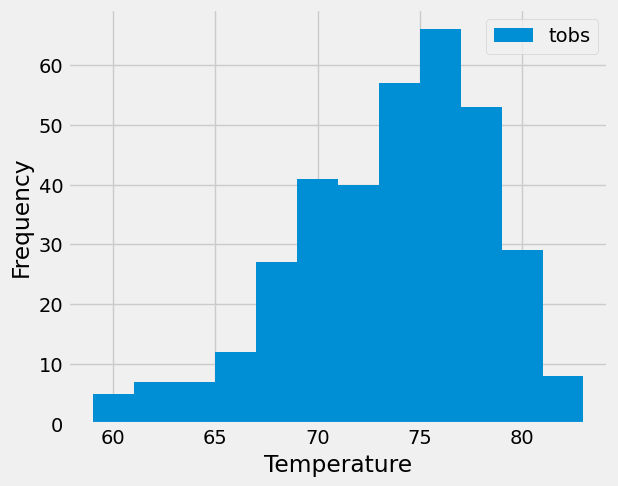

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()